In [1]:
import numpy as np

**1. La temperatura de su piel es aproximadamente igual a 35◦ C Cuál es la longitud de onda a la que se
presenta el pico en la radiación emitida en su piel?**


$$\sigma = 5,67^{-8} \frac{W}{mt^2 k^4}$$

Podemos calcular la emisividad:


$$\epsilon = \sigma T^{4}$$

$$ = ( 5,67^{-8} \frac{W}{mt^2 k^4})(35°C + 273)^{4}$$


In [2]:
temp_kelvin = (35 + 273)
sigma = (5.67e-8)
emisividad  = sigma * (temp_kelvin**4)
emisividad

510.2534207232

Despejamos $\lambda_{max}$ :  

In [3]:
cte = 2.898e-3
lambda_max = cte/temp_kelvin
lambda_max

9.40909090909091e-06

La longitud de onda muy pequeña más allá del espectro visible.

**2.
    a) En cuanto disminuirá la masa del sol durante un año a causa de la radiación electromagnética que emite.**


$$\epsilon = \sigma T^{4}$$

teniendo en cuenta las unidades de emisivilidad:

$$\epsilon = \frac{E}{t\cdot A} = \frac{mc^2}{t \cdot A}$$

Igualamos:

$$\frac{mc^2}{t \cdot A} = \sigma T^{4}$$

In [4]:
c = 299792458                             # mt/s, velocidad de la luz en el vacío
r = 6.95700e8                             # mt, radio del sol
area_superficial_sol = 4 * np.pi * (r**2) # area superficial de una esfera
temp_superficial = 5778                   # K
segundos_en_un_año = 365.25*24*60*60      # s

In [5]:
mass = sigma*(temp_superficial**4)*(segundos_en_un_año * area_superficial_sol)/(c**2)
print("masa que perdió por radiación: ", mass)

masa que perdió por radiación:  1.3496142057393826e+17


**b) Suponiendo que la radiación del sol es constante Cuánto tiempo tardará la masa del sol en reducirse a la mitad?**

In [6]:
masa_sol_actual =  1.9891e30    #kg

In [7]:
tiempo = masa_sol_actual*(c**2)/(2*sigma*area_superficial_sol*(temp_superficial**4))
tiempo_en_años = tiempo/(365.25*24*60*60)
print("tiempo en años: ", tiempo_en_años, "tiempo en segundos: ", tiempo)

tiempo en años:  7369142943002.281 tiempo en segundos:  2.325524653380888e+20


**3. a) Use la ley de Stefan para calcular la potencia total radiada por unidad de área por un filamento de tungsteno a una temperatura de 3000K (Suponga que el filamento es un radiador ideal).**


In [8]:
temperatura_bombillo = 3000
potencia_por_area_aka_emisividad = sigma*(temperatura_bombillo**4)

print("Potencia por unidad de area, osea emisividad: ", potencia_por_area_aka_emisividad)

Potencia por unidad de area, osea emisividad:  4592700.0


 **b) si el filamento de tungsteno de una lámpara de 75 W. Cuál es el área superficial del filamento? (suponga que la principal perdida de energı́a es por radiación).**

In [9]:
potencia_bombillo = 75
area_bombillo     = potencia_bombillo/potencia_por_area_aka_emisividad

print("area del bombillo es: ", area_bombillo)

area del bombillo es:  1.633026324384349e-05


 En clase partiendo de la distribución de radiaciń de Planck se obtuvo para bajas y altas frecuencias la
equivalencia para la teoria clásica(Stefan-Boltzman, Ley de Wien, Rayleigh Jeans). Un hecho fundamental
es que a medida que T aumenta la longitud de onda

$K_b = 1,38 \cdot 10^{-3} \frac{J}{k}$, Constante de Boltzman.


$h = 6,62607015×10e^{−34} J⋅Hz^{−1}$, Constante de Plank.

$$E_{0} = hf$$
$$c = \lambda f$$
$$f = c/ \lambda $$
$$\lambda = c/f$$

Reemplazando:

$$E_{0} = h \frac{c}{\lambda}$$

$$\displaystyle P(K, T) = \frac{f^2 8\pi}{c^3}  \cdot \bigg(\frac{ \frac{hc}{\lambda}}{e^{ \frac{hc}{\lambda K_{B}T}}-1} \bigg)$$

$$\displaystyle P(K, T) = \frac{f^2 8\pi h c}{\lambda c^3}  \cdot \bigg(\frac{1}{e^{ \frac{hc}{\lambda K_{B}T}}-1} \bigg)$$

$$\displaystyle P(K, T) = \frac{f^2 8\pi h}{\lambda c^2}  \cdot \bigg(\frac{1}{e^{ \frac{hc}{\lambda K_{B}T}}-1} \bigg)$$

Reemplazamos $c  = \lambda f$

$$\displaystyle P(K, T) = \frac{f^2 8\pi h}{\lambda^{3} f^2}  \cdot \bigg(\frac{1}{e^{ \frac{hc}{\lambda K_{B}T}}-1} \bigg)$$


$$\displaystyle P(K, T) = \frac{8\pi h}{\lambda^{3}}  \cdot \bigg(\frac{1}{e^{ \frac{hc}{\lambda K_{B}T}}-1} \bigg)$$



In [29]:
from sympy import *
from sympy.plotting import plot

In [74]:
l = Symbol('l')       # lambda
facts = Q.positive(l) # lambda es positivo

h = 6.62607015e-34
kb = 1.38e-3
T = 36 + 273          #temperatura del cuerpo en K 

with assuming(facts):
    plank_distrib = (8*np.pi/(l**3)) * (1/(np.e**( (h*c)/(l*kb*T) ) -1 ))
    #plank_distrib = (8*np.pi/(l**3)) * (1/(np.e**( (h*c)/(l*kb*T) ) ))
    plank_distrib_deriv = diff(plank_distrib)


In [75]:
plank_distrib

25.1327412287183/(l**3*(2.71828182845905**(4.65842563001015e-25/l) - 1))

<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
/home/dave/anaconda3/lib/python3.9/site-packages/sympy/plotting/plot.py:1603: RuntimeWarning: invalid value encountered in subtract
  vector_a = (x - y).astype(np.float64)
/home/dave/anaconda3/lib/python3.9/site-packages/sympy/plotting/plot.py:1604: RuntimeWarning: invalid value encountered in subtract
  vector_b = (z - y).astype(np.float64)


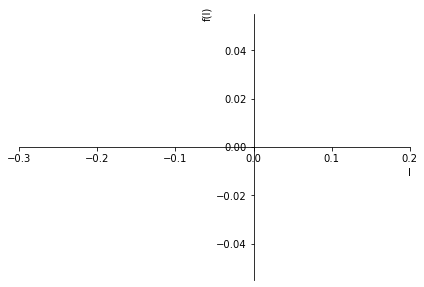

In [76]:
with assuming(facts):
    plot(plank_distrib, xlim=[-0.3,0.2])

In [77]:
plank_distrib_deriv

1.17079005892274e-23*2.71828182845905**(4.65842563001015e-25/l)/(l**5*(2.71828182845905**(4.65842563001015e-25/l) - 1)**2) - 75.398223686155/(l**4*(2.71828182845905**(4.65842563001015e-25/l) - 1))

<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: invalid value encountered in double_scalars


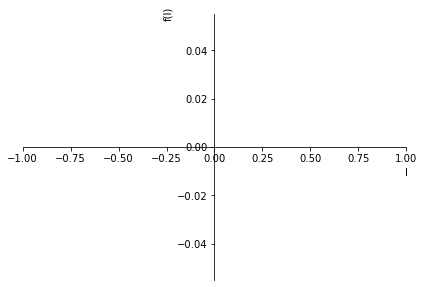

In [78]:
with assuming(facts):
    plot(plank_distrib_deriv, xlim=[-1,1])

In [16]:
#solve(plank_distrib_deriv, l)